<a href="https://colab.research.google.com/github/nandwanatarun/EVA-DeepLearning/blob/Session-17%2618/S18_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Alignment And Stabilization Using Dlib

## Import Data

In [89]:
import sys
import os
IN_COLAB = 'google.colab' in sys.modules
from google.colab import files
#uploaded0 = files.upload() # then browse, select the files. It's then uploaded

!git clone https://github.com/nandwanatarun/test.git
!ls test/

#if IN_COLAB:
# import os
os.chdir('test/')


Cloning into 'test'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1095 (delta 7), reused 5 (delta 1), pack-reused 1072
Receiving objects: 100% (1095/1095), 156.71 MiB | 30.72 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (1091/1091), done.
data		    generator_model_10000.h5  results  videos
faceBlendCommon.py  models		      s15


## Import Packages

In [0]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import faceBlendCommon as fbc
%matplotlib inline
 
#for fbc in uploaded0.keys():
 # print('User uploaded file "{name}" with length {length} bytes'.format(name=fbc, length=len(uploaded0[fbc])))

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## Utilities

In [0]:
import os

In [0]:
# save all images to disk
def save_all_images(path, filename, imageList):
  for cnt in range(0, len(imageList)):
    temp_fn = filename + '_' + str(cnt) + '.png'
    fn = os.path.join(path) + os.path.join(temp_fn)
    cv2.imwrite(fn, imageList[cnt])

## Process Video into Frames

In [0]:
# process the video frame by frame
cap = cv2.VideoCapture('videos/VID-20180627-WA0005.mp4')

all_frames = []
while(cap.isOpened()):
    ret, frame = cap.read()

    if frame is None:
      break

    all_frames.append(frame)
    #plt.imshow(frame)

cap.release()

In [94]:
len(all_frames)

172

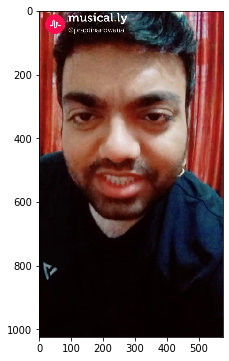

In [95]:
plt.imshow(all_frames[0][:,:,::-1])

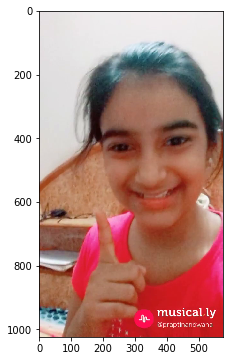

In [96]:
plt.imshow(all_frames[100][:,:,::-1])

In [0]:
if not os.path.isdir('results'):
  os.mkdir('results')

In [0]:
if not os.path.isdir('results/original'):
  os.mkdir('results/original')

In [0]:
save_all_images('results/original/', 'frame', all_frames)

## Align Faces Using 5 Point Landmark Detector

### Get the model for 5 point landmark detector

In [0]:
# Landmark model location
#uploaded1 = files.upload() # then browse, select the files. It's then uploaded
#import shape_predictor_5_face_landmarks as PREDICTOR_PATH
#MODEL_PATH = 'models/'
#PREDICTOR_PATH = MODEL_PATH + "shape_predictor_5_face_landmarks.dat"
PREDICTOR_PATH = "models/shape_predictor_5_face_landmarks.dat"


### Initialize Face Detector

In [101]:
# Get the face detector
#for fdat in uploaded1.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(name=fdat, length=len(uploaded1[fdat])))
faceDetector = dlib.get_frontal_face_detector()

# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)
print(landmarkDetector)

### Align Faces

In [0]:
# get the aligned face
def get_aligned_face(im):
  # Detect faces in the image
  faceRects = faceDetector(im, 0)
  print("Number of faces detected: ",len(faceRects))

  # Detect landmarks.
  points = fbc.getLandmarks(faceDetector, landmarkDetector, im)

  #print(len(points))

  points = np.array(points)
  # Convert image to floating point in the range 0 to 1
  im = np.float32(im)/255.0

  # Dimensions of output image
  h = 600
  w = 600

  # Normalize image to output coordinates.
  imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

  imNorm = np.uint8(imNorm*255)
  return imNorm

In [103]:
len(all_frames)

172

In [104]:
# Get aligned faces for all frames.
all_aligned_faces = []

print('Aligning all frames... ')
# process one frame at a time. 
#for cnt in range(0, len(all_frames)):
for cnt in range(0, 100):
  frame = all_frames[cnt]
  aligned_face = get_aligned_face(frame)
  all_aligned_faces.append(aligned_face)

print('Done!')

Aligning all frames... 
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces det

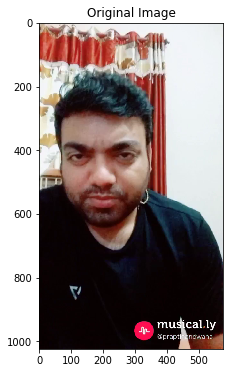

In [105]:
# Display the results
plt.imshow(all_frames[50][:,:,::-1])
plt.title("Original Image")
plt.show()

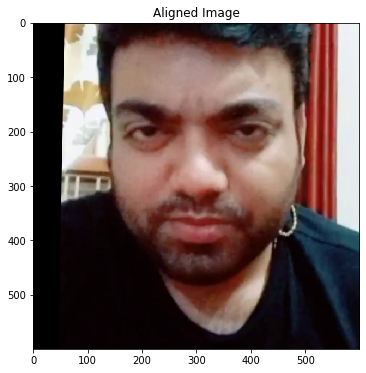

In [106]:
# Display the results
plt.imshow(all_aligned_faces[50][:,:,::-1])
plt.title("Aligned Image")
plt.show()

In [0]:
if not os.path.isdir('results/align_faces'):
  os.mkdir('results/align_faces')

In [0]:
save_all_images('results/align_faces/', 'align_face', all_aligned_faces)

## Stabilize Landmarks Points

### Calculate the 68 point landmark on Aligned Face.

In [0]:
#MODEL_PATH = 'models/'
#PREDICTOR_PATH = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"
PREDICTOR_PATH = "models/shape_predictor_68_face_landmarks.dat"
#uploaded = files.upload() # then browse, select the files. It's then uploaded
#for fdat2 in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(name=fdat2, length=len(uploaded[fdat2])))
RESIZE_HEIGHT = 480
NUM_FRAMES_FOR_FPS = 100
SKIP_FRAMES = 1

In [0]:
# Function to calculate the intereye distance.
def interEyeDistance(predict):
  leftEyeLeftCorner = (predict[36].x, predict[36].y)
  rightEyeRightCorner = (predict[45].x, predict[45].y)
  distance = cv2.norm(np.array(rightEyeRightCorner) - np.array(leftEyeLeftCorner))
  distance = int(distance)
  return distance

In [0]:
winName = "Stabilized facial landmark detector"

In [0]:
#videoFileName = "videos/NewsFeedTrim3.mp4"
videoFileName = "videos/VID-20180627-WA0005.mp4"

# Initializing video capture object.
cap = cv2.VideoCapture(videoFileName)

if(cap.isOpened()==False):
  print("Unable to load video")

### Parameters for Lucas Kanade Method

In [0]:
import math
from google.colab.patches import cv2_imshow

In [0]:
winSize = 101
maxLevel = 10
fps = 30.0
# Grab a frame
ret,imPrev = cap.read()

In [0]:
# Finding the size of the image.
size = imPrev.shape[0:1]

In [116]:
print(size)
print(imPrev.shape)

(1024,)
(1024, 576, 3)


In [0]:
# initialize the face detector
detector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

In [0]:
# Initializing the parameters
points=[]
pointsPrev=[]
pointsDetectedCur=[]
pointsDetectedPrev=[]

In [0]:
eyeDistanceNotCalculated = True
eyeDistance = 0
isFirstFrame = True
# Initial value, actual value calculated after 100 frames
fps = 10
showStabilized = False
count =0

In [0]:
all_stabilized_frames = []

In [121]:
while(True):
  if (count==0):
    t = cv2.getTickCount()

  # Grab a frame
  ret,im = cap.read()
  if im is None:
    break
    
  imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  # COnverting to grayscale
  imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  imGrayPrev = imGray
  height = im.shape[0]
  IMAGE_RESIZE = float(height)/RESIZE_HEIGHT
  # Resize image for faster face detection
  imSmall = cv2.resize(im, None, fx=1.0/IMAGE_RESIZE, fy=1.0/IMAGE_RESIZE,interpolation = cv2.INTER_LINEAR)
  imSmallDlib = cv2.cvtColor(imSmall, cv2.COLOR_BGR2RGB)
  # Skipping the frames for faster processing
  if (count % SKIP_FRAMES == 0):
    faces = detector(imSmallDlib,0)

  # If no face was detected
  if len(faces)==0:
    print("No face detected")

  # If faces are detected, iterate through each image and detect landmark points
  else:
    for i in range(0,len(faces)):
      print("face detected")
      # Face detector was found over a smaller image.
      # So, we scale face rectangle to correct size.
      newRect = dlib.rectangle(int(faces[i].left() * IMAGE_RESIZE),
        int(faces[i].top() * IMAGE_RESIZE),
        int(faces[i].right() * IMAGE_RESIZE),
        int(faces[i].bottom() * IMAGE_RESIZE))
      
      # Detect landmarks in current frame
      landmarks = landmarkDetector(imDlib, newRect).parts()
      
      # Handling the first frame of video differently,for the first frame copy the current frame points
      
      if (isFirstFrame==True):
        pointsPrev=[]
        pointsDetectedPrev = []
        [pointsPrev.append((p.x, p.y)) for p in landmarks]
        [pointsDetectedPrev.append((p.x, p.y)) for p in landmarks]

      # If not the first frame, copy points from previous frame.
      else:
        pointsPrev=[]
        pointsDetectedPrev = []
        pointsPrev = points
        pointsDetectedPrev = pointsDetectedCur

      # pointsDetectedCur stores results returned by the facial landmark detector
      # points stores the stabilized landmark points
      points = []
      pointsDetectedCur = []
      [points.append((p.x, p.y)) for p in landmarks]
      [pointsDetectedCur.append((p.x, p.y)) for p in landmarks]

      # Convert to numpy float array
      pointsArr = np.array(points,np.float32)
      pointsPrevArr = np.array(pointsPrev,np.float32)

      # If eye distance is not calculated before
      if eyeDistanceNotCalculated:
        eyeDistance = interEyeDistance(landmarks)
        print(eyeDistance)
        eyeDistanceNotCalculated = False

      if eyeDistance > 100:
          dotRadius = 3
      else:
        dotRadius = 2

      print(eyeDistance)
      sigma = eyeDistance * eyeDistance / 400
      s = 2*int(eyeDistance/4)+1

      #  Set up optical flow params
      lk_params = dict(winSize  = (s, s), maxLevel = 5, criteria = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 20, 0.03))
      # Python Bug. Calculating pyramids and then calculating optical flow results in an error. So directly images are used.
      # ret, imGrayPyr= cv2.buildOpticalFlowPyramid(imGray, (winSize,winSize), maxLevel)

      pointsArr,status, err = cv2.calcOpticalFlowPyrLK(imGrayPrev,imGray,pointsPrevArr,pointsArr,**lk_params)
      

      # Converting to float
      pointsArrFloat = np.array(pointsArr,np.float32)

      # Converting back to list
      points = pointsArrFloat.tolist()

      # Final landmark points are a weighted average of
      # detected landmarks and tracked landmarks
      for k in range(0,len(landmarks)):
        d = cv2.norm(np.array(pointsDetectedPrev[k]) - np.array(pointsDetectedCur[k]))
        alpha = math.exp(-d*d/sigma)
        points[k] = (1 - alpha) * np.array(pointsDetectedCur[k]) + alpha * np.array(points[k])

      # Drawing over the stabilized landmark points
      if showStabilized is True:
        for p in points:
          cv2.circle(im,(int(p[0]),int(p[1])),dotRadius, (255,0,0),-1)
      else:
        for p in pointsDetectedCur:
          cv2.circle(im,(int(p[0]),int(p[1])),dotRadius, (0,0,255),-1)

      isFirstFrame = False
      count = count+1

      # Calculating the fps value
      if ( count == NUM_FRAMES_FOR_FPS):
        t = (cv2.getTickCount()-t)/cv2.getTickFrequency()
        fps = NUM_FRAMES_FOR_FPS/t
        count = 0
        isFirstFrame = True

      # Display the landmarks points
      cv2.putText(im, "{:.1f}-fps".format(fps), (50, size[0]-50), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 0, 255), 3,cv2.LINE_AA)
      #cv2.imshow(winName, im)
      #cv2_imshow(im)
      # key = cv2.waitKey(25) & 0xFF

      # # Use spacebar to toggle between Stabilized and Unstabilized version.
      # if key==32:
      #   showStabilized = not showStabilized

      # # Stop the program.
      # if key==27:
      #   sys.exit()

      all_stabilized_frames.append(im)

      # Getting ready for next frame
      imPrev = im
      imGrayPrev = imGray

#cv2.destroyAllwindows()
cap.release()

face detected
292
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face detected
292
face d

In [122]:
len(all_stabilized_frames)

165

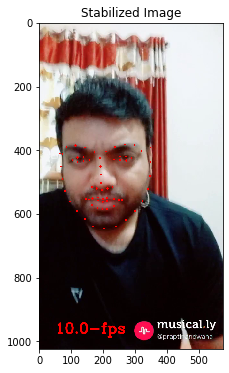

In [123]:
# Display the results
plt.imshow(all_stabilized_frames[50][:,:,::-1])
plt.title("Stabilized Image")
plt.show()

In [0]:
# There is no previous info for the frist frame.
# Inorder to make video, we want to have the total number of frames equal.
# so, just insert the first stabilized video frame as zeroth entry as well.
all_stabilized_frames.insert(0, all_stabilized_frames[0])

In [125]:
len(all_stabilized_frames)

166

In [0]:
if not os.path.isdir('results/stab_frames'):
  os.mkdir('results/stab_frames')

In [0]:
save_all_images('results/stab_frames/', 'stab_frame', all_stabilized_frames)

In [128]:
!git add results/align_faces/
#!git status
!git add results/original/
!git add results/stab_frames/
#!git status
#!git show-ref
#!git branch
#!touch results/align_faces/
!git checkout -b "master"
!git commit -m "initial commit"
!git push -u origin head:master

fatal: A branch named 'master' already exists.

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@3f64afb84ac8.(none)')
error: src refspec head does not match any.
error: failed to push some refs to 'https://github.com/nandwanatarun/test.git'


Stitch Images to Video Using OpenCV Import Data

In [0]:
# read all images
def read_all_images(dir, filename_prefix, num_files):
  result_list = []
  for cnt in range(0, num_files):
    fn = filename_prefix + '_' + str(cnt) + '.png'
    full_path = os.path.join(dir, fn)
    img = cv2.imread(full_path)
    result_list.append(img)

  return result_list

In [0]:
#original_frames = read_all_images(all_frames, 'frame', 153)

In [0]:
#aligned_frames = read_all_images(all_aligned_faces, 'align_face', 153)

In [0]:
#stabilized_frames = read_all_images(all_stabilized_frames, 'stab_frame', 153)

In [133]:
print(all_frames[0].shape)
print(all_aligned_faces[0].shape)
print(all_stabilized_frames[0].shape)

(1024, 576, 3)
(600, 600, 3)
(1024, 576, 3)


Resize images

In [0]:
def resize_images(imageList, width, height):
  result_list = []
  for cnt in range(0, len(imageList)):
    new_img = cv2.resize(imageList[cnt], (width, height), interpolation=cv2.INTER_AREA)
    result_list.append(new_img)
  return result_list

In [135]:
len(all_frames)

172

In [0]:
orig_frames_resized = resize_images(all_frames, 600, 600)

In [137]:
orig_frames_resized[0].shape

(600, 600, 3)

In [0]:
stab_frames_resized = resize_images(all_stabilized_frames, 600, 600)

In [139]:
stab_frames_resized[0].shape

(600, 600, 3)

In [0]:
#align_frames_resized = resize_images(all_aligned_faces, 600, 600)
#align_frames_resized[0].shape

In [0]:
stitched_frames = []
for cnt in range(0, 100):
  new_img = np.hstack((orig_frames_resized[cnt], align_frames_resized[cnt], stab_frames_resized[cnt]))
  stitched_frames.append(new_img)

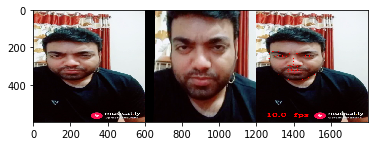

In [143]:
plt.imshow(stitched_frames[50][:,:,::-1])

Save Stiched Images

In [0]:
# save all images to disk
def save_all_images(path, filename, imageList):
  for cnt in range(0, len(imageList)):
    temp_fn = filename + '_' + str(cnt) + '.png'
    fn = os.path.join(path) + os.path.join(temp_fn)
    cv2.imwrite(fn, imageList[cnt])

In [147]:
os.mkdir('/content/StitchedImages')

FileExistsError: ignored

In [0]:
save_all_images('/content/StitchedImages/', 'stitch', stitched_frames)

In [149]:
!cp -r '/content/StitchedImages' '/content/drive/My Drive/EVA/Session 18'

cp: cannot create directory '/content/drive/My Drive/EVA/Session 18': No such file or directory



Create Video

In [150]:
stitched_frames[0].shape

(600, 1800, 3)

In [0]:
?cv2.VideoWriter

In [0]:
fps = 30
size = (stitched_frames[0].shape[0], stitched_frames[0].shape[1])
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size )

In [0]:
for cnt in range(0, len(stitched_frames)):
  out.write(stitched_frames[cnt])
out.release()

In [154]:
!cp '/content/project.avi' '/content/drive/My Drive/App/EVA/Session18'

cp: cannot stat '/content/project.avi': No such file or directory



Create Video in MP4 format

In [0]:
#mp4_out = cv2.VideoWriter('project.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 15, size)

mp4_out = cv2.VideoWriter('project.mp4', cv2.VideoWriter_fourcc('F','M','P','4'), 15, size)
#cv2.VideoWriter_fourcc('F','M','P','4')

In [156]:
len(stitched_frames)

100

In [0]:

for cnt in range(0, len(stitched_frames)):
  mp4_out.write(stitched_frames[cnt])


#mp4_out.release()

In [192]:
!git add project.avi
#!git status
#!git status
!git show-ref
!git branch
#!touch results/align_faces/
!git config user.email "nandwanatarun@gmail.com"
!git config user.name "nandwanatarun"
!git config user.password "Welcome2Tarun"
#!git status
!git remote add origin /test/.git
!git checkout -b "master"
!git commit -a -m "initialVideo"

#!cp '/project.mp4' '/results/'

663fdc778c706e623092a7125324d4b7fff1ffff refs/heads/master
e2fd04e7055fe062789a44370b3ee09ec8a3500d refs/remotes/origin/HEAD
e2fd04e7055fe062789a44370b3ee09ec8a3500d refs/remotes/origin/master
6674aba8936be8582b2d477c95a108ce6db66773 refs/remotes/origin/test
* master
fatal: remote origin already exists.
fatal: A branch named 'master' already exists.
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
error: src refspec head does not match any.
error: failed to push some refs to 'https://github.com/nandwanatarun/test.git'


In [213]:
!git clone https://github.com/nandwanatarun/test.git
Username: nandwanatarun
Password: 5d6ce505a793c816bc3355dc35be6a51412b54d1
!git push --set-upstream origin master

SyntaxError: ignored